<b> T5 Data Science Bootcamp</b>

# is it phishing?


<img src="url.png"  width=800 height=800/>

by: Norah Alqahtani, Shroaq Almutiri, and Batoul Alosaimi

## Table of Contents:


<li><a id='Introduction'> Introduction</a></li>
<li><a id='Libraries'> Libraries</a></li>
<li><a id='1. Collect data'> 1. Collect data</a></li>
<li><a id=' 2.Data Preparing '>2. Data Preparing  </a></li>
<li><a id='3.Exploratory Data Analysis'>3. Exploratory Data Analysis </a></li>
<li><a id='4.Feature Engenering'>4. Feature Engineering </a></li>
<li><a id='5. Splitting the data'>5. Splitting the data</a></li>
<li><a id='6. Data Modeling'>6. Data Modeling</a></li>
<li><a id='7. Evaluating'>7. Evaluating</a></li>
<li><a id='8. Test URL'>8. Test URL</a></li>

<li><a id='9. Conclusion'>9. Conclusion</a></li>


## Introduction

> Malicious URL, a.k.a. malicious website, is a common and serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. It is imperative to detect and act on such threats in a timely manner. Traditionally, this detection is done mostly through the usage of blacklists. However, blacklists cannot be exhaustive, and lack the ability to detect newly generated malicious URLs. To improve the generality of malicious URL detectors, machine learning techniques have been explored with increasing attention in recent years. So, we aim in this Project to take advantage of Classification techniques to predict whether a specific URL malicious od benign. 

## Libraries

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



## 1.Collect data

>Our Data Sources consist of tow Parts, First one is group of URLs that has been checked via **whois** command to verify whether it is *benign* or *Phishing* URL. 

>while second part is features of these URLs which have been fetched via **whois** command too. the features were: whois_regDate, whois_expDate, whois_updatedDate, dot_count, url_len, digit_count, special_count, hyphen_count, double_slash, single_slash, at_the_rate, protocol, and protocol_count

>Then we merged these Two Datasets to have ***data_df*** Dataframe

In [50]:
data_df = pd.read_csv('Data/datawithlabel.csv')
data_df

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,label,url
0,403,326,23,6,225,58,12,4,0,10,0,0,0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,2727,194,168,7,177,47,0,1,0,11,0,0,0,1,serviciosbys.com/paypal.cgi.bin.get-into.herf....
2,5431,46,317,6,60,0,0,0,0,2,0,0,0,1,mail.printakid.com/www.online.americanexpress....
3,3643,374,5,1,116,21,1,1,1,10,0,0,0,1,thewhiskeydregs.com/wp-content/themes/widescre...
4,-1,-1,-1,3,36,0,0,0,0,1,0,0,0,1,smilesvoegol.servebbs.org/voegol.php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8450,316,473,2,23,0,0,0,0,2,0,0,0,0,www.stepfour.com/genie/
9996,8719,776,1109,3,28,0,0,0,0,1,0,0,0,0,www.grasmick.com/hrcheck.htm
9997,7481,553,112,3,43,1,0,0,0,3,0,0,0,0,www.angelfire.com/fl3/lsandleben/index.html
9998,7658,376,3,3,38,0,0,1,0,1,0,0,0,0,www.performance-appraisal.com/home.htm


###### 1.1 Dataframe's Information

In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   whois_regDate      10000 non-null  int64 
 1   whois_expDate      10000 non-null  int64 
 2   whois_updatedDate  10000 non-null  int64 
 3   dot_count          10000 non-null  int64 
 4   url_len            10000 non-null  int64 
 5   digit_count        10000 non-null  int64 
 6   special_count      10000 non-null  int64 
 7   hyphen_count       10000 non-null  int64 
 8   double_slash       10000 non-null  int64 
 9   single_slash       10000 non-null  int64 
 10  at_the_rate        10000 non-null  int64 
 11  protocol           10000 non-null  int64 
 12  protocol_count     10000 non-null  int64 
 13  label              10000 non-null  int64 
 14  url                10000 non-null  object
dtypes: int64(14), object(1)
memory usage: 1.1+ MB


In [52]:
data_df.shape

(10000, 15)

In [53]:
data_df.describe()

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,3939.303200,351.922500,219.110000,3.077600,52.107800,4.817100,0.974300,0.438900,0.009600,2.634500,0.002900,0.0,0.020200,0.500000
std,3462.563449,644.289641,414.138095,1.844646,47.632128,14.922148,2.955624,1.140963,0.100543,2.024035,0.109054,0.0,0.154254,0.500025
min,-1.000000,-129.000000,-1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,2.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
50%,4007.000000,173.000000,97.000000,3.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.500000
75%,7364.000000,432.000000,281.000000,3.000000,55.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.0,0.000000,1.000000
max,12068.000000,32444.000000,17995.000000,37.000000,1076.000000,200.000000,55.000000,18.000000,2.000000,28.000000,10.000000,0.0,3.000000,1.000000


###### 1.2 columns name

In [54]:
data_df.columns

Index(['whois_regDate', 'whois_expDate', 'whois_updatedDate', 'dot_count',
       'url_len', 'digit_count', 'special_count', 'hyphen_count',
       'double_slash', 'single_slash', 'at_the_rate', 'protocol',
       'protocol_count', 'label', 'url'],
      dtype='object')

## 2.Data Preparing  

###### 2.1 find and drop unll values

In [55]:
data_df.duplicated().sum()

0

###### 2.2 find duplicated

In [56]:
data_df.isna().sum()

whois_regDate        0
whois_expDate        0
whois_updatedDate    0
dot_count            0
url_len              0
digit_count          0
special_count        0
hyphen_count         0
double_slash         0
single_slash         0
at_the_rate          0
protocol             0
protocol_count       0
label                0
url                  0
dtype: int64

### 3. Exploratory Data Analysis

###### 3.1 Target

In [57]:
data_df.label.value_counts()


1    5000
0    5000
Name: label, dtype: int64

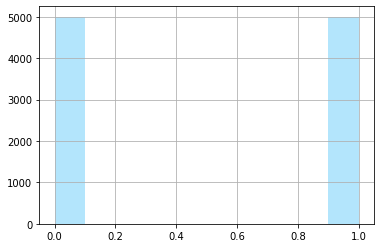

In [58]:
data_df.label.hist(color='#b3e5fc')

###### 3.2 check the correlation between the Target and features, and between each features 

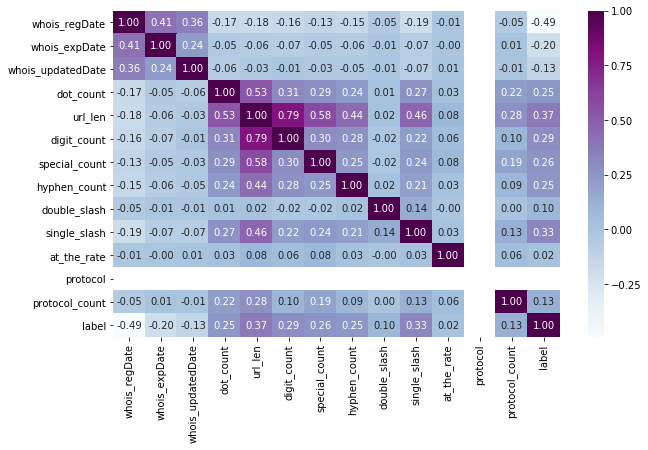

In [59]:
corr =data_df.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.savefig('./Cor') 
plt.show()

###### 3.3 Drowing a Pairplot

/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta 

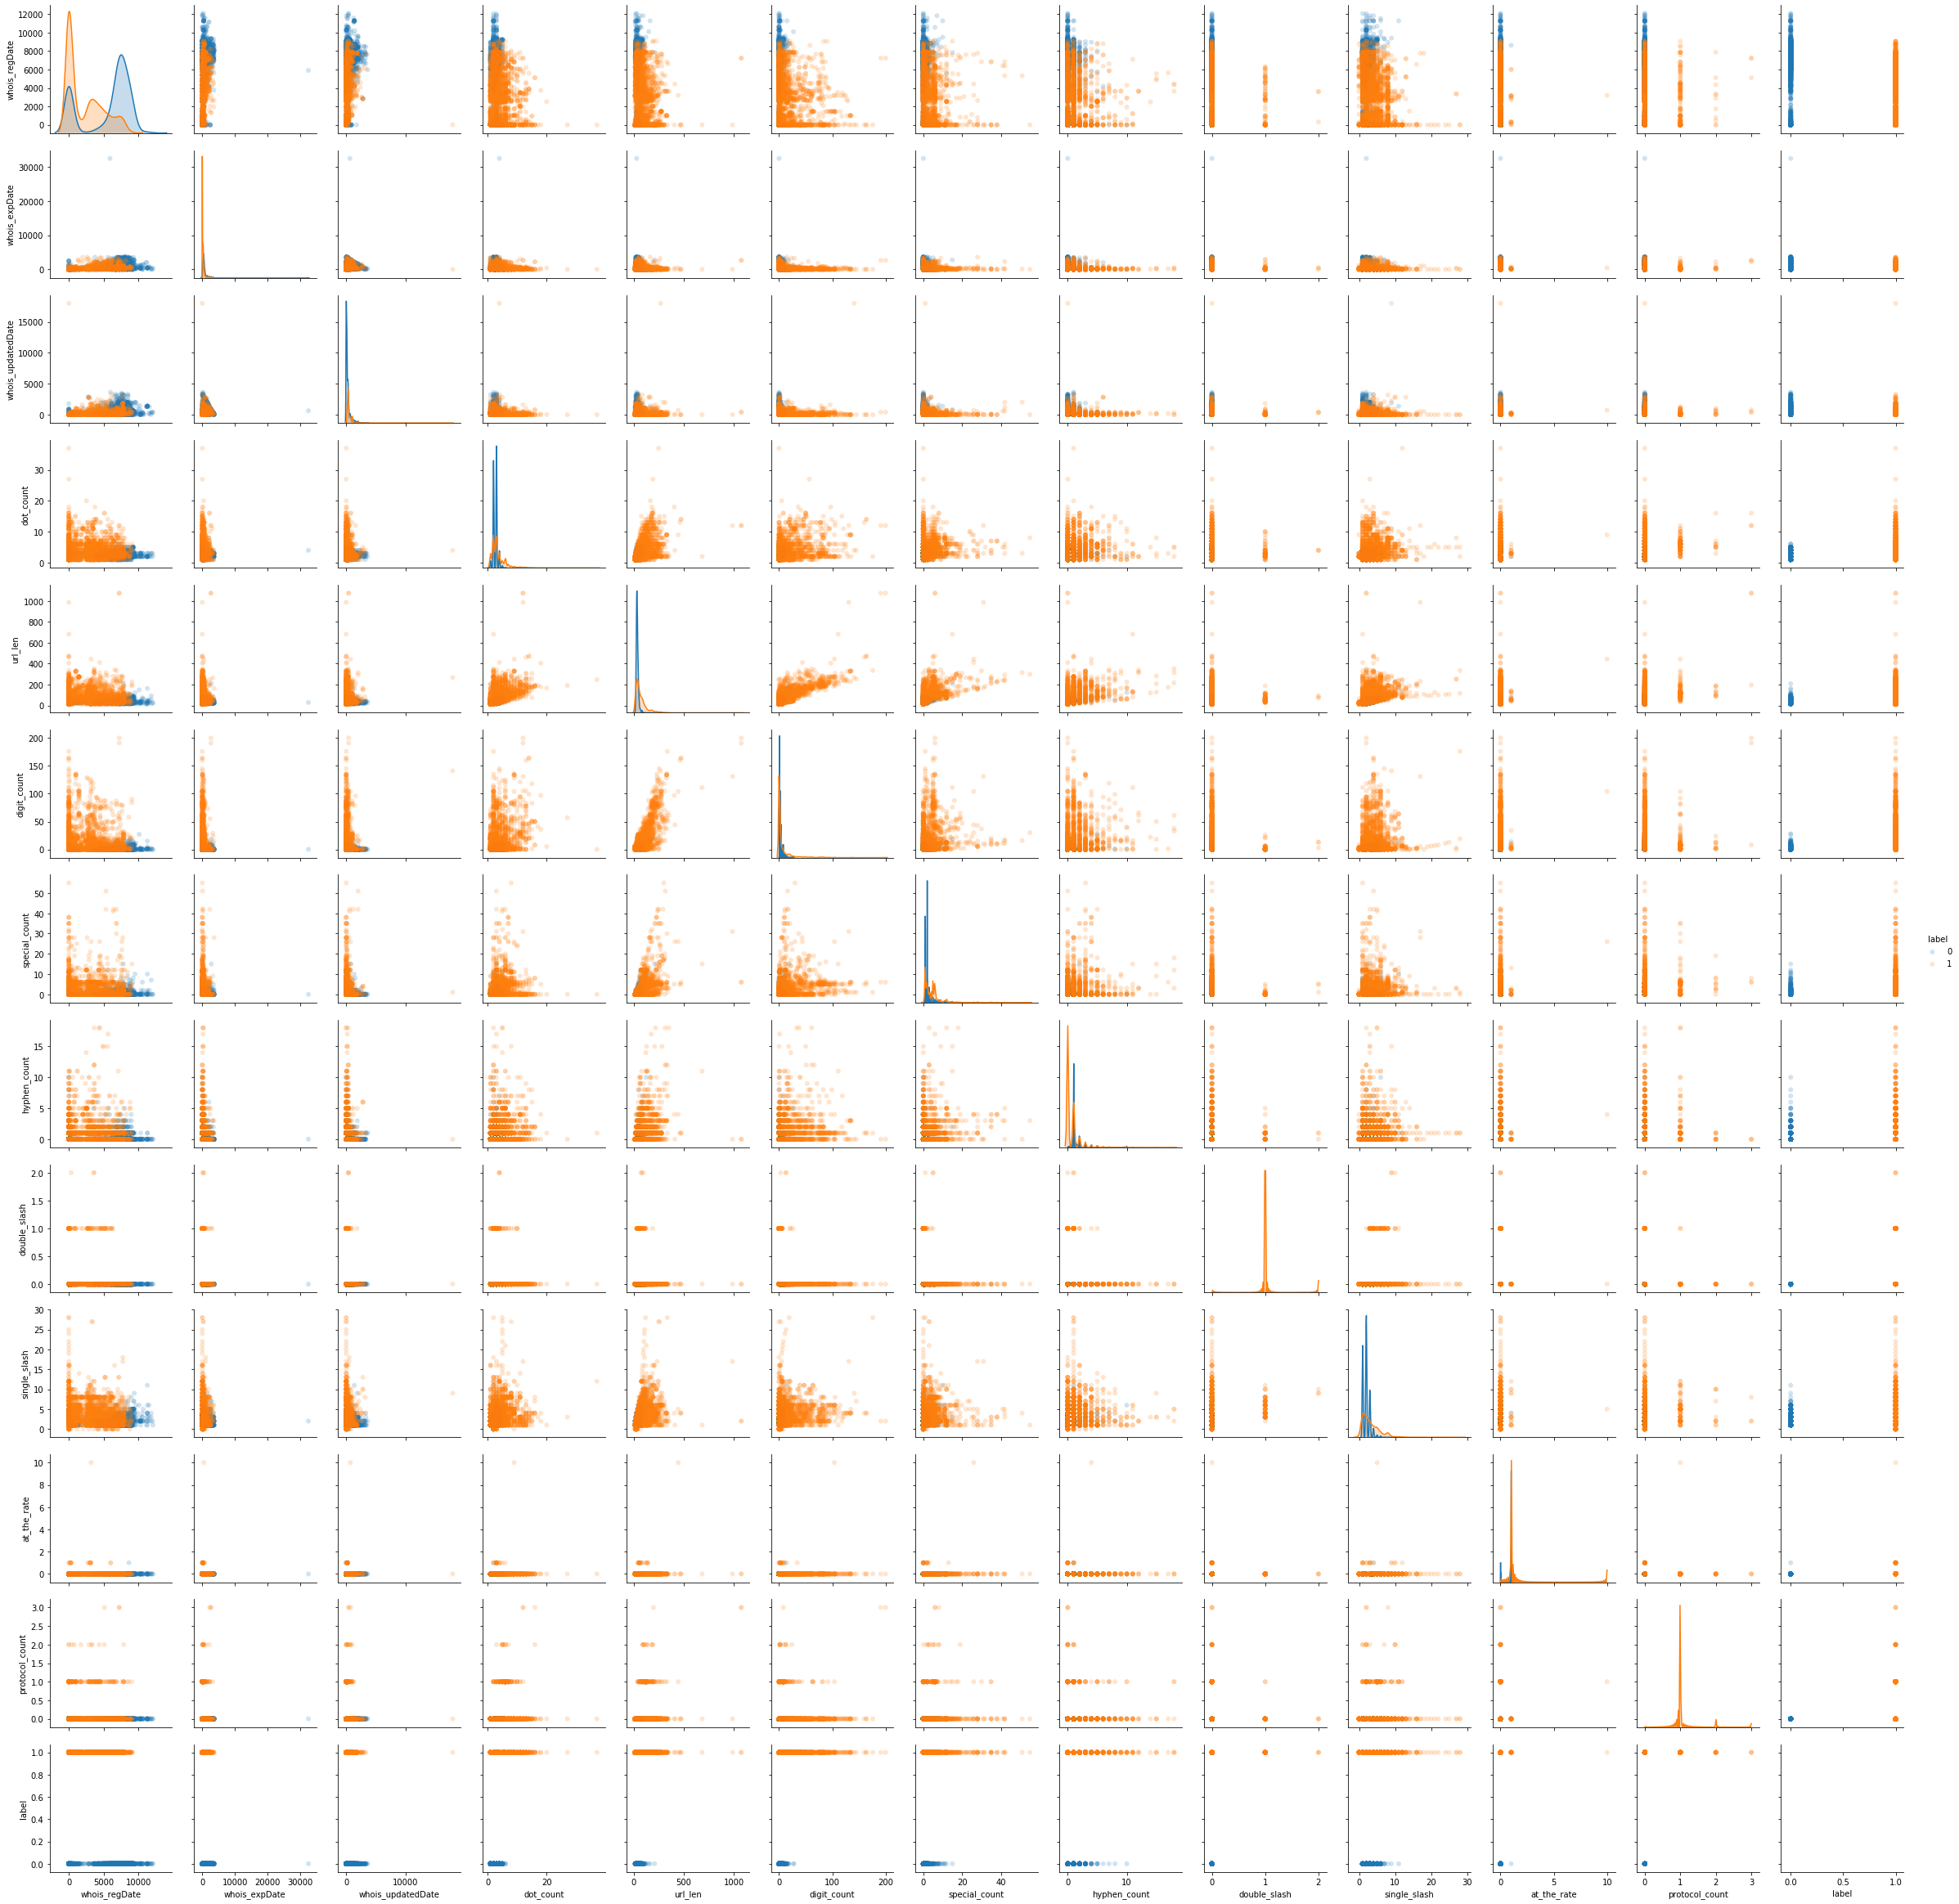

In [12]:
sns.pairplot(data_df, plot_kws=dict(alpha=.2, edgecolor='none'), hue='label')

>for better view of the data in the pair plot we will add "is_mal?" column hold same value as 'label' column

In [60]:
data_df['is_mal?'] = data_df['label'].apply(lambda x: 'yes' if x == 1 else 'no')
data_df

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,label,url,is_mal?
0,403,326,23,6,225,58,12,4,0,10,0,0,0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,yes
1,2727,194,168,7,177,47,0,1,0,11,0,0,0,1,serviciosbys.com/paypal.cgi.bin.get-into.herf....,yes
2,5431,46,317,6,60,0,0,0,0,2,0,0,0,1,mail.printakid.com/www.online.americanexpress....,yes
3,3643,374,5,1,116,21,1,1,1,10,0,0,0,1,thewhiskeydregs.com/wp-content/themes/widescre...,yes
4,-1,-1,-1,3,36,0,0,0,0,1,0,0,0,1,smilesvoegol.servebbs.org/voegol.php,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8450,316,473,2,23,0,0,0,0,2,0,0,0,0,www.stepfour.com/genie/,no
9996,8719,776,1109,3,28,0,0,0,0,1,0,0,0,0,www.grasmick.com/hrcheck.htm,no
9997,7481,553,112,3,43,1,0,0,0,3,0,0,0,0,www.angelfire.com/fl3/lsandleben/index.html,no
9998,7658,376,3,3,38,0,0,1,0,1,0,0,0,0,www.performance-appraisal.com/home.htm,no


/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta 

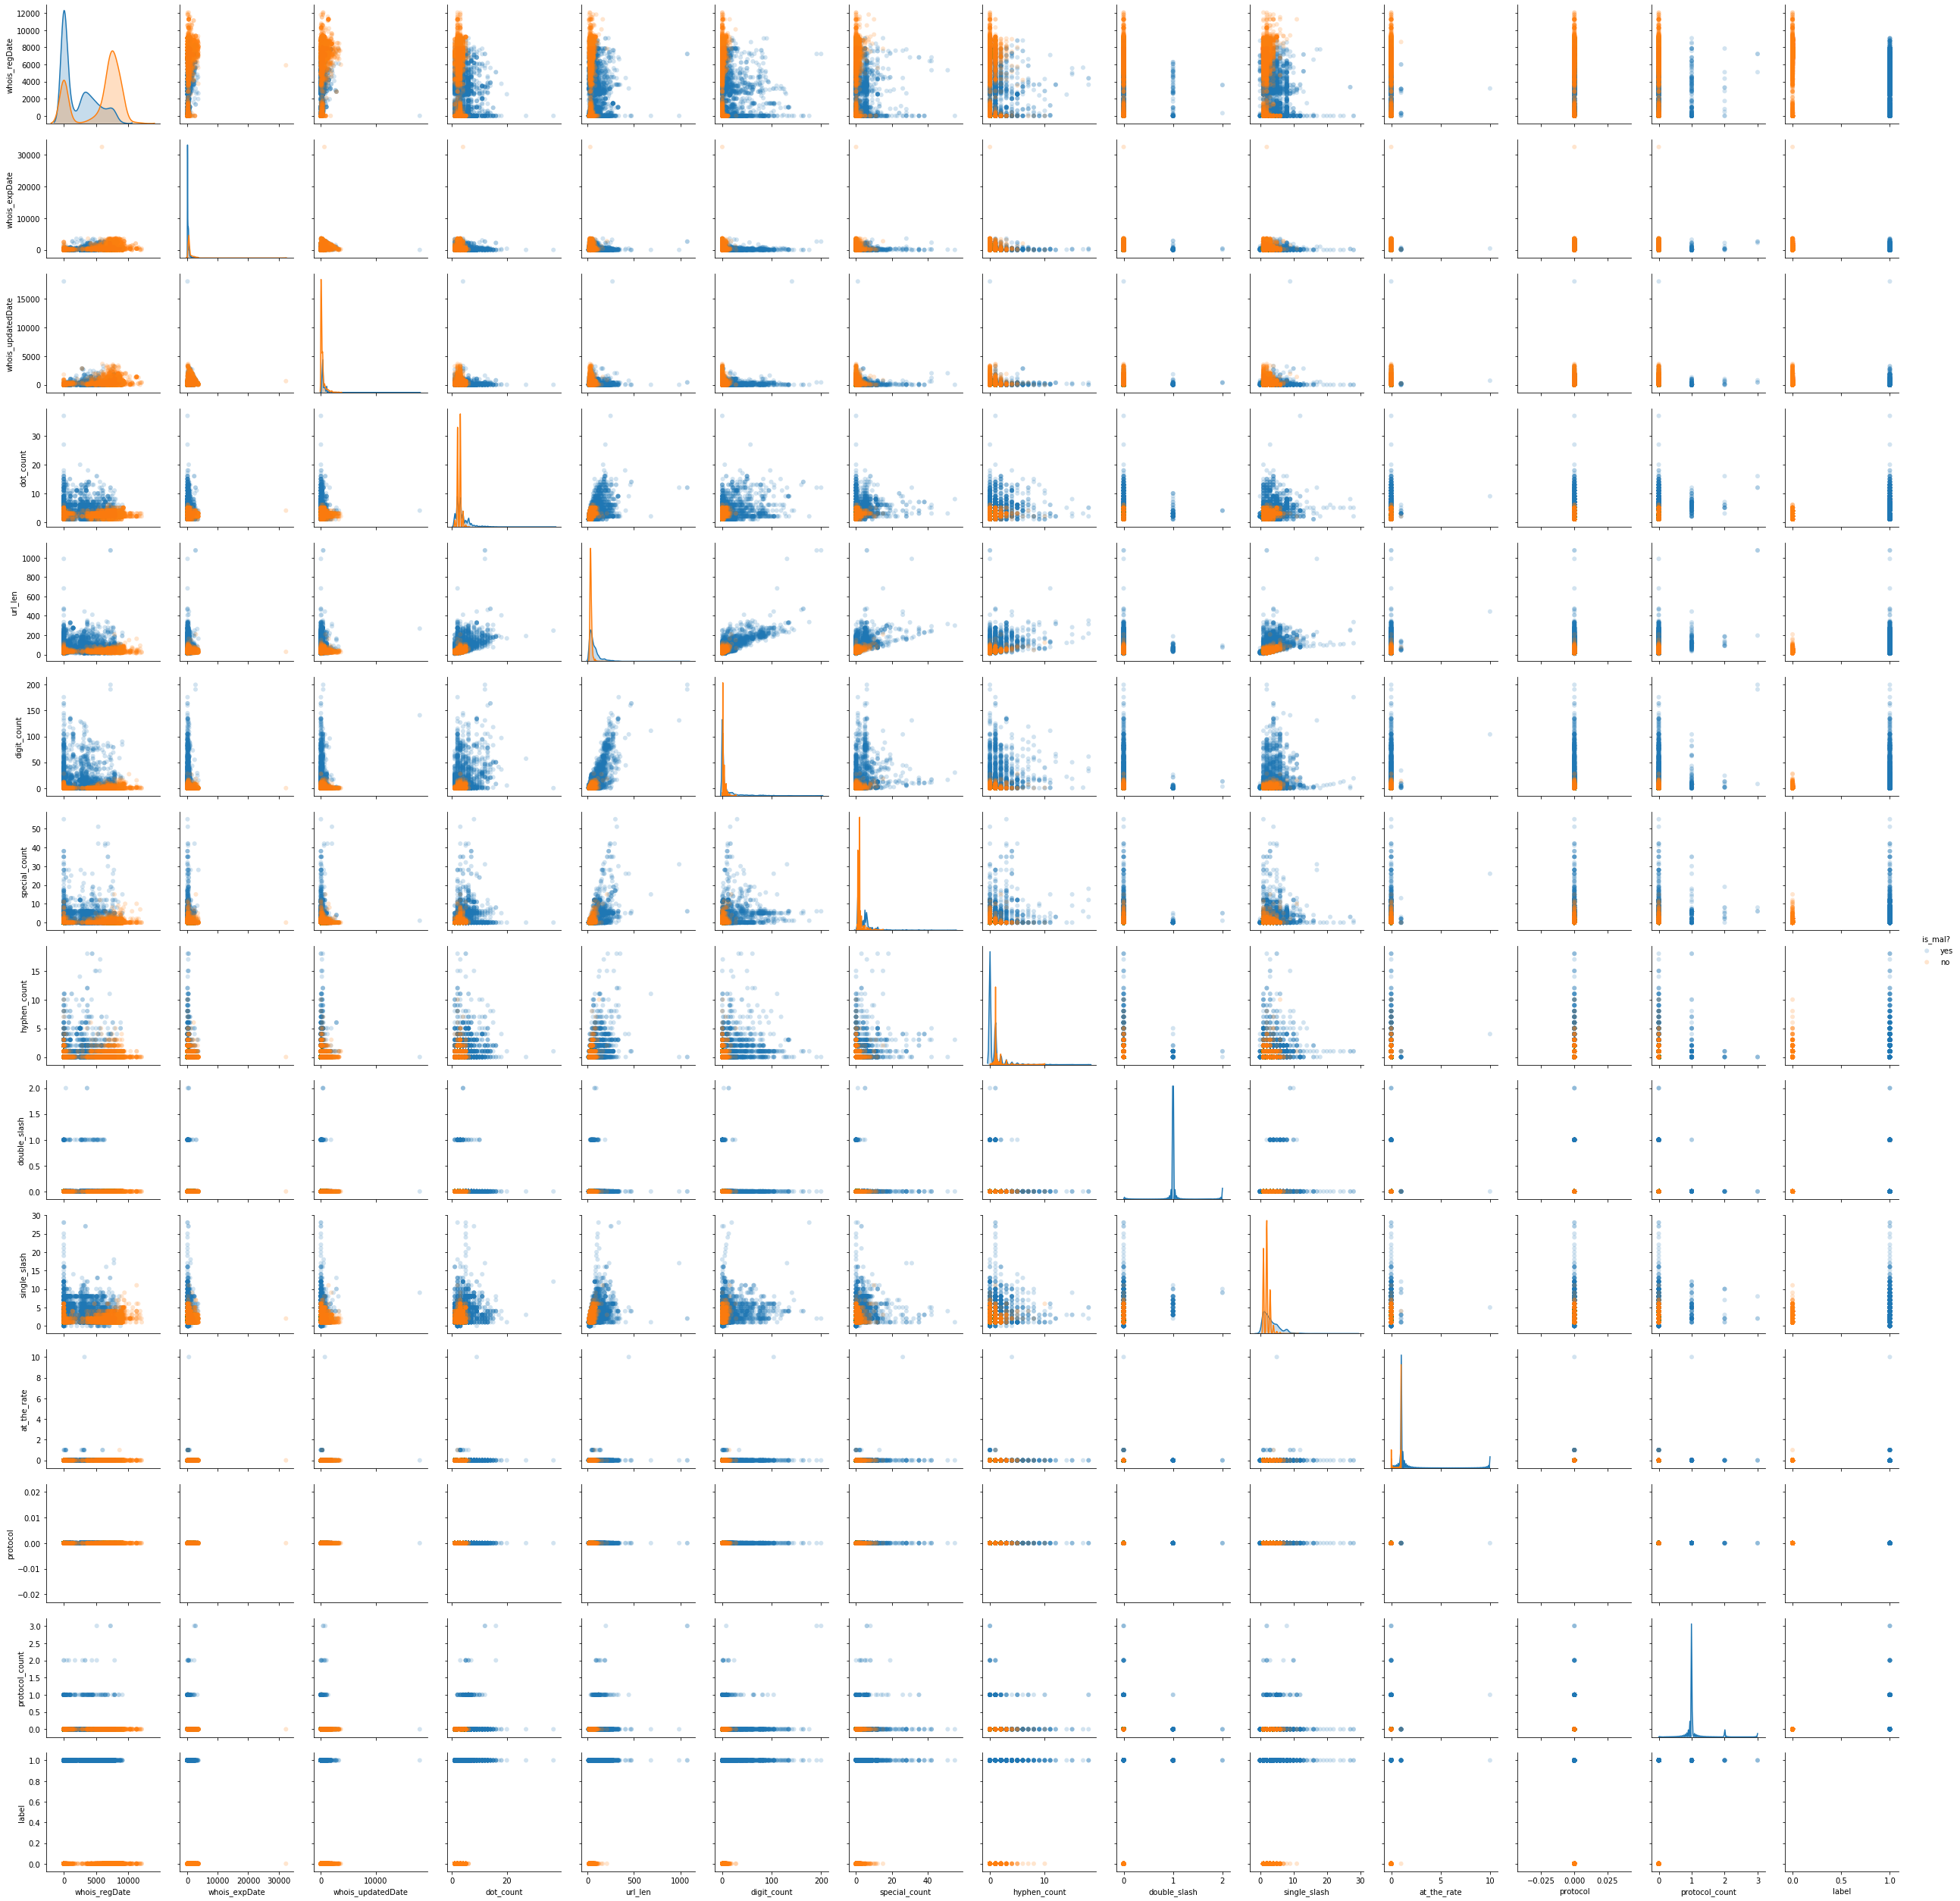

In [61]:
sns.pairplot(data_df, plot_kws=dict(alpha=.2, edgecolor='none'), hue='is_mal?')

## 4. Feature Engineering

> we can see that 'protocol' column has no values but 0 in it so we think it will not be useful so we will drop it

In [62]:
data_df.protocol.value_counts()

0    10000
Name: protocol, dtype: int64

In [63]:
data_df.drop(['protocol'], axis='columns', inplace=True)
data_df.head(1)

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol_count,label,url,is_mal?
0,403,326,23,6,225,58,12,4,0,10,0,0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,yes


>The scale of at_the_rate column is deferent than the other columns, since it uses binary system counting instead of decimal counting. In addition, it has a poor relationship with the Target. Given all of that we decided to drop it


In [64]:
data_df.drop(['at_the_rate'], axis='columns', inplace=True)
data_df.head(1)

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,protocol_count,label,url,is_mal?
0,403,326,23,6,225,58,12,4,0,10,0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,yes


## 5. Splitting the data

In [65]:
X = data_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10] ].values #not including protocol and at_the_rate features
y = data_df['label']

In [66]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.40,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,random_state=42)


## 6. Data Modeling
We now compare different types of classifiers

In [67]:
# create a dict to store the scores of each model
models_dict = {'Model':[],
              'Accuracy':[],
              'Recall':[],
              'Precision':[],
              'F1 score':[],}

#### 6.1 Baseline Model: K-Nearest Neighbors

In [68]:
#train the model and validate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_val)

print("\nKNN Accuracy=",accuracy_score(y_val, knn_y_pred))
print("KNN F1 score=",f1_score(y_val, knn_y_pred))


KNN Accuracy= 0.845
KNN F1 score= 0.8477905073649754


In [69]:
#test the baseline model
test_pred=knn.predict(X_test)
print("\nKNN Accuracy=",accuracy_score(y_test, test_pred))
print("KNN F1 score=",f1_score(y_test, test_pred))


KNN Accuracy= 0.84275
KNN F1 score= 0.8463229904715367


Text(33.0, 0.5, 'Actual')

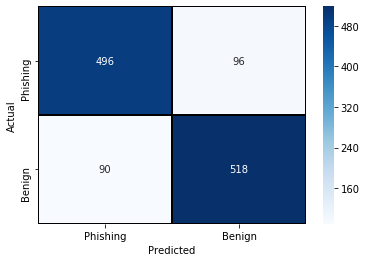

In [70]:
cm = confusion_matrix(y_val, knn_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
# finding the best k
k_range = list(range(1,100))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range , weights=weight_options)
gc = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
gc.fit(X_train_val, y_train_val)
gc.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [71]:
best_knn = KNeighborsClassifier(n_neighbors=20,weights= 'distance')
best_knn.fit(X_train,y_train)
knn_best_y_pred = best_knn.predict(X_val)

print("\nKNN Accuracy=",accuracy_score(y_val, knn_best_y_pred))
print("KNN F1 score=",f1_score(y_val, knn_best_y_pred))


KNN Accuracy= 0.8608333333333333
KNN F1 score= 0.8641171684296175


In [72]:
y_pred_proba = best_knn.predict_proba(X_val)[::,1]
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_val, y_pred_proba)
knn_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("KNN ")
models_dict['Accuracy'].append(accuracy_score(y_val, knn_best_y_pred))
models_dict['Recall'].append(recall_score(y_val, knn_best_y_pred ,average="binary"))
models_dict['Precision'].append(precision_score(y_val, knn_best_y_pred))
models_dict['F1 score'].append(f1_score(y_val,knn_best_y_pred))

Text(33.0, 0.5, 'Actual')

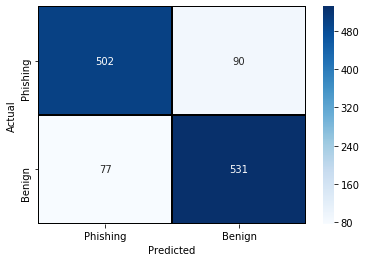

In [73]:
cm = confusion_matrix(y_val, knn_best_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 6.2 Logistic Regression

In [74]:
lr = LogisticRegression(C=1000,solver='liblinear')
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_val)

print("\nLogistic Regression Accuracy=",accuracy_score(y_val,lr_y_pred))
print("Logistic Regression F1 score=",f1_score(y_val,lr_y_pred))


Logistic Regression Accuracy= 0.7558333333333334
Logistic Regression F1 score= 0.7661612130885874


In [75]:
y_pred_proba = lr.predict_proba(X_val)[::,1]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_val, y_pred_proba)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Logistic Regression ")
models_dict['Accuracy'].append(accuracy_score(y_val, lr_y_pred))
models_dict['Recall'].append(recall_score(y_val, lr_y_pred))
models_dict['Precision'].append(precision_score(y_val, lr_y_pred))
models_dict['F1 score'].append(f1_score(y_val, lr_y_pred))

Text(33.0, 0.5, 'Actual')

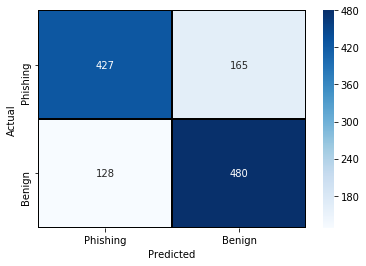

In [76]:
cm = confusion_matrix(y_val, lr_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 6.3 Dicision Tree


###### Dicision Tree Tuning


In [64]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : list(range(5,20)),
             'max_features': ['auto', 'sqrt', 'log2']}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid,
                           cv=5, verbose=True, scoring = 'f1')
grid_search.fit(X_train_val, y_train_val)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(criterion='entropy', max_depth=19, max_features='auto',
                       random_state=42)


In [77]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier( criterion='entropy', max_depth=19, max_features='auto',random_state=42)

tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_val)

print("DT Accuracy=",accuracy_score(y_val, tree_y_pred))
print("DT F1 score=",f1_score(y_val, tree_y_pred))

DT Accuracy= 0.8516666666666667
DT F1 score= 0.8511705685618729


In [78]:
# stroring the best models in the dict
y_pred_proba = tree.predict_proba(X_val)[::,1]
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_val, y_pred_proba)
dt_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Decision Tree")
models_dict['Accuracy'].append(accuracy_score(y_val, tree_y_pred))
models_dict['Recall'].append(recall_score(y_val, tree_y_pred))
models_dict['Precision'].append(precision_score(y_val,tree_y_pred))
models_dict['F1 score'].append(f1_score(y_val,tree_y_pred))

Text(33.0, 0.5, 'Actual')

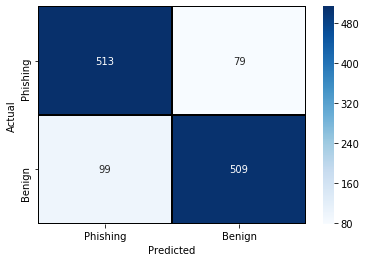

In [79]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, tree_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 6.4 Random Forest


In [69]:
# define random_grid for tuning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


###### Random Forest Tuning

In [78]:
# Random Forest Tuning
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2,
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train_val, y_train_val)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [80]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=1200,
                                 min_samples_split=2,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=20,
                                 bootstrap=True)
rf_best.fit(X_train, y_train)
rf_best_y_pred = rf_best.predict(X_val)


print("RF Accuracy=",accuracy_score(y_val, rf_best_y_pred))
print("RF F1 score=",f1_score(y_val, rf_best_y_pred))

RF Accuracy= 0.8825
RF F1 score= 0.8835672997522708


In [81]:
# stroring the best models in the dict
y_pred_proba = rf_best.predict_proba(X_val)[::,1]
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_val, y_pred_proba)
rf_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Random Forest")
models_dict['Accuracy'].append(accuracy_score(y_val, rf_best_y_pred))
models_dict['Recall'].append(recall_score(y_val, rf_best_y_pred))
models_dict['Precision'].append(precision_score(y_val, rf_best_y_pred))
models_dict['F1 score'].append(f1_score(y_val, rf_best_y_pred))

Text(33.0, 0.5, 'Actual')

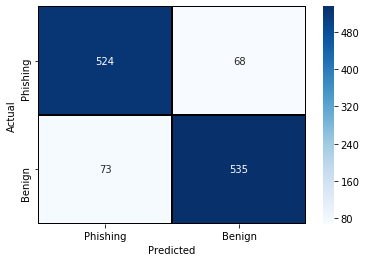

In [82]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, rf_best_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 6.5 Naive Bayes.



In [83]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_pred = nb.predict(X_val)

print("Naive Bayes Accuracy: ",accuracy_score(y_val, nb_y_pred))
print("Naive Bayes F1 score: ",f1_score(y_val, nb_y_pred))



Naive Bayes Accuracy:  0.7441666666666666
Naive Bayes F1 score:  0.6744432661717922


In [84]:
y_pred_proba = nb.predict_proba(X_val)[::,1]
nb_fpr, nb_tpr, nb_threshold = roc_curve(y_val, y_pred_proba)
nb_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Naive Bayes")
models_dict['Accuracy'].append(accuracy_score(y_val, nb_y_pred))
models_dict['Recall'].append(recall_score(y_val, nb_y_pred))
models_dict['Precision'].append(precision_score(y_val, nb_y_pred))
models_dict['F1 score'].append(f1_score(y_val, nb_y_pred))

Text(33.0, 0.5, 'Actual')

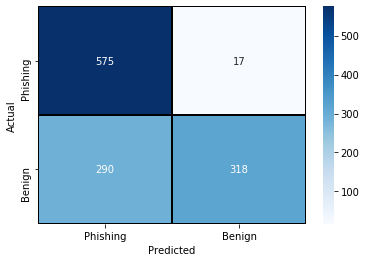

In [85]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, nb_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 6.6 SVM



In [86]:
svm = SVC(kernel='rbf',probability=True)
svm.fit(X_train,y_train)
svm_y_pred = svm.predict(X_val)

print("svm Accuracy: ",accuracy_score(y_val, svm_y_pred))
print("svm F1 score: ",f1_score(y_val, svm_y_pred))

svm Accuracy:  0.7758333333333334
svm F1 score:  0.7948131197559115


In [87]:
y_pred_proba = svm.predict_proba(X_val)[::,1]
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_val, y_pred_proba)
svm_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("SVM")
models_dict['Accuracy'].append(accuracy_score(y_val, svm_y_pred))
models_dict['Recall'].append(recall_score(y_val, svm_y_pred))
models_dict['Precision'].append(precision_score(y_val, svm_y_pred))
models_dict['F1 score'].append(f1_score(y_val, svm_y_pred))

Text(33.0, 0.5, 'Actual')

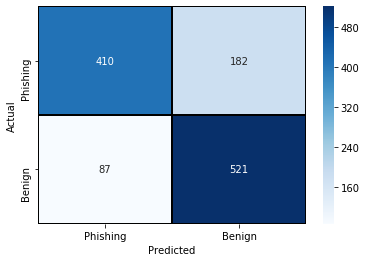

In [88]:
cm = confusion_matrix(y_val,svm_y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### 3.7 XGBoost 

In [89]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
         'objective': ['binary:logistic']}

xgbc = xgb.XGBClassifier(seed = 20)

rs = RandomizedSearchCV(estimator=xgbc, 
                   param_distributions=params,
                   cv = 5,
                   scoring='f1', 
                   verbose=1,
                    n_iter=25)

rs.fit(X_train_val, y_train_val, eval_metric= 'logloss')
rs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.7999999999999999,
 'objective': 'binary:logistic',
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.6}

In [90]:
xgbc = xgb.XGBClassifier(subsample= 0.7999999999999999,
 objective= 'binary:logistic',
 n_estimators= 500,
 max_depth= 5,
 learning_rate= 0.1,
 colsample_bytree= 0.8999999999999999,
 colsample_bylevel= 0.6
                        )

xgbc.fit(X_train,y_train,eval_metric= 'logloss')
xgbc_y_pred = xgbc.predict(X_val)

print("xgbc Accuracy=",accuracy_score(y_val, xgbc_y_pred))
print("xgbc F1 score=",f1_score(y_val, xgbc_y_pred))

xgbc Accuracy= 0.885
xgbc F1 score= 0.8851913477537438


In [91]:
# stroring the best models in the dict
y_pred_proba = xgbc.predict_proba(X_val)[::,1]
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_val, y_pred_proba)
xgb_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("XGBoost")
models_dict['Accuracy'].append(accuracy_score(y_val, xgbc_y_pred))
models_dict['Recall'].append(recall_score(y_val, xgbc_y_pred))
models_dict['Precision'].append(precision_score(y_val, xgbc_y_pred))
models_dict['F1 score'].append(f1_score(y_val,xgbc_y_pred))

#### 3.8 Ensembling with staking

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
 
estimators = [
     ('rf', RandomForestClassifier(n_estimators=1200,
                                 min_samples_split=2,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=20,
                                 bootstrap=True)),
    ('xgb',xgb.XGBClassifier(subsample= 0.7999999999999999,
 objective= 'binary:logistic',
 n_estimators= 500,
 max_depth= 5,
 learning_rate= 0.1,
 colsample_bytree= 0.8999999999999999,
 colsample_bylevel= 0.6
                        )),
    
    ('knn',KNeighborsClassifier(n_neighbors=20,weights= 'distance'))
    
    
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,random_state=42)

clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_val)

print("SC Accuracy=",accuracy_score(y_val, clf_y_pred))
print("SC F1 score=",f1_score(y_val,clf_y_pred))


SC Accuracy= 0.8908333333333334
SC F1 score= 0.8921810699588478


In [96]:
y_pred_proba = clf.predict_proba(X_val)[::,1]
Stacking_fpr, Stacking_tpr, Stacking_threshold = roc_curve(y_val, y_pred_proba)
Stacking_roc_auc = roc_auc_score(y_val, y_pred_proba)


In [97]:
models_dict['Model'].append("StackingClassifier")
models_dict['Accuracy'].append(accuracy_score(y_val, clf_y_pred))
models_dict['Recall'].append(recall_score(y_val, clf_y_pred))
models_dict['Precision'].append(precision_score(y_val, clf_y_pred))
models_dict['F1 score'].append(f1_score(y_val, clf_y_pred))

## 7. Evaluating

###### 7.1 Table showing all confusion matrix values of the models.

In [98]:
# conver the dict into dataframe for visualizations
result = pd.DataFrame.from_dict(models_dict)
result

,Model,Accuracy,Recall,Precision,F1 score
0,KNN,0.860833,0.873355,0.855072,0.864117
1,Logistic Regression,0.755833,0.789474,0.744186,0.766161
2,Decision Tree,0.851667,0.837171,0.865646,0.851171
3,Random Forest,0.882500,0.879934,0.887231,0.883567
4,Naive Bayes,0.744167,0.523026,0.949254,0.674443
5,SVM,0.775833,0.856908,0.741110,0.794813
6,XGBoost,0.885000,0.875000,0.895623,0.885191
7,StackingClassifier,0.890833,0.891447,0.892916,0.892181


###### 7.2  ROC Curve

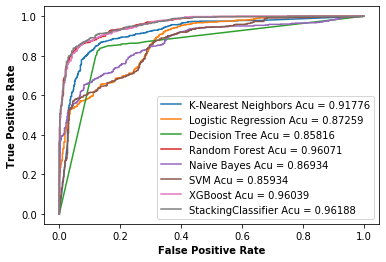

In [99]:
# plotting the ROC curve
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors Acu = {:0.5f}'.format(knn_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Acu = {:0.5f}'.format(lr_roc_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Acu = {:0.5f}'.format(dt_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Acu = {:0.5f}'.format(rf_roc_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Acu = {:0.5f}'.format(nb_roc_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM Acu = {:0.5f}'.format(svm_roc_auc))
plt.plot(xgb_fpr, xgb_tpr,label='XGBoost Acu = {:0.5f}'.format(xgb_roc_auc))
plt.plot(Stacking_fpr, Stacking_tpr,label='StackingClassifier Acu = {:0.5f}'.format(Stacking_roc_auc))

plt.legend()
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold');

###### 7.3 select the best model and evaluating it .

In [46]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=1200,
                                 min_samples_split=2,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=20,
                                 bootstrap=True)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)


print("RF Accuracy=",accuracy_score(y_test, y_pred))
print("RF F1 score=",f1_score(y_test, y_pred))

RF Accuracy= 0.9252
RF F1 score= 0.9257641921397378


Text(33.0, 0.5, 'Actual')

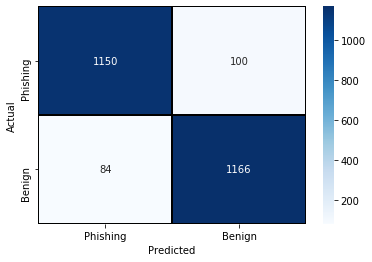

In [50]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d" , xticklabels = ["Phishing", "Benign"] , yticklabels =["Phishing", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1250
           1       0.92      0.93      0.93      1250

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



#### Save the model

In [75]:
pickle.dump(rf_best, open('model.pkl', 'wb'))


## 8. Test URL


> In order to to make our Project more reliable; we created a way to test any URL and verify if ti is phishing or begine, By take advantage of **python-whois** and **tldextract** to extrct feachers of a URL,  

In [54]:
pip install python-whois

     |████████████████████████████████| 91 kB 265 kB/s eta 0:00:011
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87701 sha256=641415c439632af8af52217ee93919c2a5836efc4cac262d69e404aca655882a
  Stored in directory: /Users/batoul/Library/Caches/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois
You should consider upgrading via the '/Users/batoul/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install tldextract

     |████████████████████████████████| 87 kB 771 kB/s eta 0:00:01
You should consider upgrading via the '/Users/batoul/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import whois
import datetime
from os.path import splitext
import tldextract
from urllib.parse import urlparse
import os

In [2]:
#url = 'www.angelfire.com/scifi/WilliamWallace/'


function to perform whois on given url:

In [3]:
def perform_whois(url):
    try:
        whois_result = whois.whois(url)
        return whois_result
    except Exception:
        return False

Extracting whois features from URLs:

In [4]:
#function to fetch the website age in days using URL created_date
def get_registered_date_in_days(whois_result):
    if(whois_result!=False):
        created_date = whois_result.creation_date
        if((created_date is not None) and (type(created_date)!=str)):
            if(type(created_date)==list):
                created_date=created_date[0]
            today_date=datetime.datetime.now()
            days = (today_date-created_date).days
            return days
        else:
            return -1
    else:
        return -1

In [5]:
#function to fetch the website expiry date in days using URL expiration_date
def get_expiration_date_in_days(whois_result):
    if(whois_result!=False):
        expiration_date = whois_result.expiration_date
        if((expiration_date is not None) and (type(expiration_date)!=str)):
            if(type(expiration_date)==list):
                expiration_date = expiration_date[0]
            today_date=datetime.datetime.now()
            days = (expiration_date-today_date).days
            return days
        else:
            return -1
    else:
        return -1

In [6]:
#function to fetch the website's last updated date in days using URL updated_date
def get_updated_date_in_days(whois_result):
    if(whois_result!=False):
        updated_date = whois_result.updated_date
        if((updated_date is not None) and (type(updated_date)!=str)):
            if(type(updated_date)==list):
                updated_date = updated_date[0]
            today_date=datetime.datetime.now()
            days = (today_date-updated_date).days
            return days
        else:
            return -1
    else:
        return -1

check for dnsresolver:

In [7]:
"""def perform_dnsresolver(url):
    result = dns.resolver.query(url, 'A')
    print(type(result))
    for ipval in result:
        print('IP', ipval.to_text())"""

"def perform_dnsresolver(url):\n    result = dns.resolver.query(url, 'A')\n    print(type(result))\n    for ipval in result:\n        print('IP', ipval.to_text())"

In [8]:
"""perform_dnsresolver('google.com')"""

"perform_dnsresolver('google.com')"

In [9]:
"""sample =[]
def extract_all_features():
    for url in dataset['url']:
        sample.append(get_registered_date_in_days(url))
        #whois_resultset = get_whois_results(url)"""

"sample =[]\ndef extract_all_features():\n    for url in dataset['url']:\n        sample.append(get_registered_date_in_days(url))\n        #whois_resultset = get_whois_results(url)"

Extracting lexical features from URLs:

In [10]:
def get_dot_count(url):
    return url.count('.')

In [11]:
def get_url_length(url):
    return len(url)

In [12]:
def get_digit_count(url):
    return sum(c.isdigit() for c in url)

In [13]:
def get_special_char_count(url):
    count = 0
    special_characters = [';','+=','_','?','=','&','[',']']
    for each_letter in url:
        if each_letter in special_characters:
            count = count + 1
    return count

In [14]:
def get_hyphen_count(url):
    return url.count('-')

In [15]:
def get_double_slash(url):
    return url.count('//')

In [16]:
def get_single_slash(url):
    return url.count('/')

In [17]:
def get_protocol_count(url):
    http_count = url.count('http')
    https_count = url.count('https')
    http_count = http_count - https_count #correcting the miscount of https as http
    return (http_count + https_count)

In [18]:
expiration_date_in_days = []
updated_date_in_days = []
dotCount = []
urlLength = []
digitCount = []
specialCharCount = []
hyphenCount = []
doubleSlashCount = []
singleSlashCount = []
protocolCount = []
registered_date_in_days = []


In [19]:
def extract_all_features(url1):
    counter = 0
#    for url in dataset['url']:
 #       counter = counter + 1
    print(counter)
    whois_result = perform_whois(url1)
    #Extracting whois features from URLs
    registered_date_in_days.append(get_registered_date_in_days(whois_result))
    expiration_date_in_days.append(get_expiration_date_in_days(whois_result))
    updated_date_in_days.append(get_updated_date_in_days(whois_result))
    #Extracting lexical features from URLs
    dotCount.append(get_dot_count(url1))
    urlLength.append(get_url_length(url1))
    digitCount.append(get_digit_count(url1))
    specialCharCount.append(get_special_char_count(url1))
    hyphenCount.append(get_hyphen_count(url1))
    doubleSlashCount.append(get_double_slash(url1))
    singleSlashCount.append(get_single_slash(url1))
    protocolCount.append(get_protocol_count(url1))

In [20]:
extract_all_features("www.angelfire.com/scifi/WilliamWallace/")

0


In [23]:
features_df = pd.DataFrame()
features_df['whois_regDate'] = registered_date_in_days
features_df['whois_expDate'] = expiration_date_in_days
features_df['whois_updatedDate'] = updated_date_in_days
features_df["dot_count"] = dotCount
features_df["url_len"] = urlLength
features_df["digit_count"] = digitCount
features_df["special_count"] = specialCharCount
features_df["hyphen_count"] = hyphenCount
features_df["double_slash"] = doubleSlashCount
features_df["single_slash"] = singleSlashCount
features_df["protocol_count"] = protocolCount
#features_df["URL"] = url

In [26]:
model = pickle.load(open('model.pkl', 'rb'))

In [118]:
#1: 'phishing' ,0: 'benign'
my_url_f = features_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10] ].values
#my_url_f
url_label = rf_best.predict(my_url_f)
print(url_label)
#url_label
if url_label==0:
    features_df['label']='benign'
else:
    features_df['label']='phishing'
features_df

[0]


,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,protocol_count,label
0,8423,341,27,2,39,0,0,0,0,3,0,benign


## 9. Conclusion

>Our model solve the problem of classifing URLs with accuricy(0.93) and F1(0.93).

>By comparing our results with the results of the previous work; our accuracy is better where theirs is 0.87 
